## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [9]:
import pandas as pd
import numpy as np
file_name="../data/data_000637.txt"
data=pd.read_csv(file_name)
data=data[0:12000]

x=data['BX_COUNTER'].max()
print(x)
start=data['ORBIT_CNT'].min()
last=data['ORBIT_CNT'].max()
lasted=(last-start)*x*25
print(lasted,'ns')

xx=np.random.choice([0, 1], size=(12000))
data['HEAD'] = xx

data['actual time']=pd.Series((data['ORBIT_CNT']*x)+(data['BX_COUNTER']*25*10**-9)+data['TDC_MEAS'])
data
df_head = data[data['HEAD']>0]
du_head = data[data['TDC_CHANNEL']>=139]


3563
10599925 ns
[123 124  63  64  61 139  62  60   7   6  36  56   8   5  53  10  57  38
  58  59  54  51   1   2 127 128   4   3 117 121  45  48  46  47  12  13
  14  11  74  16  50  18  49 115  15  17  37  40  20  43 122 105 103  44
 112 108 106  41  42  25  68  24  23  26  29  31 100  33  22 119  73  65
  92  90 118  88 113  19  32  96 102  94  35 101 111  87 109  81  21  28
  75  78  89  76  27  79  72 107 110  91   9  95 114  97  98 120  80  67
 116  71  69  70  82  86  93  30  85  84  66  52  39  77 104  34  83 126
  99 125  55]


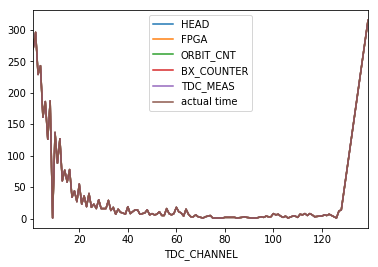

In [24]:
rgpa= data[data['FPGA']>0]
xxx=rgpa.groupby("TDC_CHANNEL").count()
%matplotlib inline
xxx.plot()

